In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [2]:
like_songs = pd.read_csv("playlist_0.csv",index_col=[0])

like_songs.head()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,...,liveness,valence,tempo,speechiness,duration_ms,time_signature,valence.1,num_bars,num_sections,num_segments
0,6Tt1P5CLUrl59oSOTVxON0,Joy,Bastille,['Bastille'],0.555,0.923,6,-4.748,0,0.1970,...,0.0778,0.363,118.007,0.1610,192681,4,0.363,92,8,654
1,2dpaYNEQHiRxtZbfNsse99,Happier,Marshmello,"['Marshmello', 'Bastille']",0.687,0.792,5,-2.749,1,0.1910,...,0.1670,0.671,100.015,0.0452,214290,4,0.671,88,9,789
2,6fNhZRFEkBfgW39W3wKARJ,Pompeii,Bastille,['Bastille'],0.679,0.715,9,-6.383,1,0.0755,...,0.2710,0.571,127.435,0.0407,214148,4,0.571,113,11,761
3,1lwvJQGhdq6Kyr4BBquf23,survivin',Bastille,['Bastille'],0.787,0.780,7,-5.023,1,0.2500,...,0.0908,0.680,95.035,0.1290,173206,4,0.680,68,8,752
4,2Fn4gZI3MAeWTiv7cSVxZQ,Another Place,Bastille,"['Bastille', 'Alessia Cara']",0.685,0.742,8,-5.409,1,0.2200,...,0.1850,0.618,115.008,0.0471,213511,4,0.618,100,10,745


In [3]:
dislike_songs = pd.read_csv("playlist_1.csv",index_col=[0])

dislike_songs.head()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,...,liveness,valence,tempo,speechiness,duration_ms,time_signature,valence.1,num_bars,num_sections,num_segments
0,3vlX5kFfQHDloPDV1cGENX,Close Your Eyes,Art Blakey & The Jazz Messengers,['Art Blakey & The Jazz Messengers'],0.565,0.2220,5,-19.933,0,0.799,...,0.0934,0.6890,99.198,0.0646,386700,4,0.6890,163,15,1505
1,2kF9Ijd7I2Kk2P4bYqUmzG,Midnight Blue - Remastered,Kenny Burrell,['Kenny Burrell'],0.652,0.3560,5,-13.733,0,0.546,...,0.1320,0.5600,148.822,0.0419,242347,4,0.5600,147,14,856
2,08lUeu1CxXvAoaKkemoEk8,Over The Rainbow,Lou Donaldson,['Lou Donaldson'],0.371,0.0823,3,-20.450,1,0.963,...,0.0838,0.0789,106.146,0.0352,431267,4,0.0789,189,19,1220
3,4vWMrM0AwlhRlkAdQtC2zn,Softly As In A Morning Sunrise,The Modern Jazz Quartet,['The Modern Jazz Quartet'],0.634,0.3270,0,-9.703,0,0.709,...,0.1580,0.4980,80.825,0.0551,209400,4,0.4980,68,10,806
4,6PKCEB5JzjCizpz9hUQcpX,It Never Entered My Mind,Coleman Hawkins,"['Coleman Hawkins', 'Ben Webster']",0.564,0.0970,5,-16.442,1,0.958,...,0.1190,0.3930,132.653,0.0380,346920,4,0.3930,190,15,1006


In [4]:
like_songs['song_like'] = np.ones((len(like_songs), 1), dtype=int)

like_songs.head()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,...,valence,tempo,speechiness,duration_ms,time_signature,valence.1,num_bars,num_sections,num_segments,song_like
0,6Tt1P5CLUrl59oSOTVxON0,Joy,Bastille,['Bastille'],0.555,0.923,6,-4.748,0,0.1970,...,0.363,118.007,0.1610,192681,4,0.363,92,8,654,1
1,2dpaYNEQHiRxtZbfNsse99,Happier,Marshmello,"['Marshmello', 'Bastille']",0.687,0.792,5,-2.749,1,0.1910,...,0.671,100.015,0.0452,214290,4,0.671,88,9,789,1
2,6fNhZRFEkBfgW39W3wKARJ,Pompeii,Bastille,['Bastille'],0.679,0.715,9,-6.383,1,0.0755,...,0.571,127.435,0.0407,214148,4,0.571,113,11,761,1
3,1lwvJQGhdq6Kyr4BBquf23,survivin',Bastille,['Bastille'],0.787,0.780,7,-5.023,1,0.2500,...,0.680,95.035,0.1290,173206,4,0.680,68,8,752,1
4,2Fn4gZI3MAeWTiv7cSVxZQ,Another Place,Bastille,"['Bastille', 'Alessia Cara']",0.685,0.742,8,-5.409,1,0.2200,...,0.618,115.008,0.0471,213511,4,0.618,100,10,745,1


In [5]:
dislike_songs['song_like'] = np.zeros((len(dislike_songs), 1), dtype=int)

dislike_songs.head()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,...,valence,tempo,speechiness,duration_ms,time_signature,valence.1,num_bars,num_sections,num_segments,song_like
0,3vlX5kFfQHDloPDV1cGENX,Close Your Eyes,Art Blakey & The Jazz Messengers,['Art Blakey & The Jazz Messengers'],0.565,0.2220,5,-19.933,0,0.799,...,0.6890,99.198,0.0646,386700,4,0.6890,163,15,1505,0
1,2kF9Ijd7I2Kk2P4bYqUmzG,Midnight Blue - Remastered,Kenny Burrell,['Kenny Burrell'],0.652,0.3560,5,-13.733,0,0.546,...,0.5600,148.822,0.0419,242347,4,0.5600,147,14,856,0
2,08lUeu1CxXvAoaKkemoEk8,Over The Rainbow,Lou Donaldson,['Lou Donaldson'],0.371,0.0823,3,-20.450,1,0.963,...,0.0789,106.146,0.0352,431267,4,0.0789,189,19,1220,0
3,4vWMrM0AwlhRlkAdQtC2zn,Softly As In A Morning Sunrise,The Modern Jazz Quartet,['The Modern Jazz Quartet'],0.634,0.3270,0,-9.703,0,0.709,...,0.4980,80.825,0.0551,209400,4,0.4980,68,10,806,0
4,6PKCEB5JzjCizpz9hUQcpX,It Never Entered My Mind,Coleman Hawkins,"['Coleman Hawkins', 'Ben Webster']",0.564,0.0970,5,-16.442,1,0.958,...,0.3930,132.653,0.0380,346920,4,0.3930,190,15,1006,0


In [6]:
like_songs.shape

(2115, 22)

In [7]:
dislike_songs.shape

(2126, 22)

In [8]:
songs = like_songs.append(dislike_songs,ignore_index=False)
songs.tail()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,...,valence,tempo,speechiness,duration_ms,time_signature,valence.1,num_bars,num_sections,num_segments,song_like
2121,1fzAuUVbzlhZ1lJAx9PtY6,Daylight,Taylor Swift,['Taylor Swift'],0.557,0.496,0,-9.602,1,0.8080,...,0.265,149.983,0.0563,293453,4,0.265,178,10,994,0
2122,0Om9WAB5RS09L80DyOfTNa,Tim McGraw,Taylor Swift,['Taylor Swift'],0.580,0.491,0,-6.462,1,0.5750,...,0.425,76.009,0.0251,232107,4,0.425,72,13,765,0
2123,4wFUdSCer8bdQsrp1M90sa,Highway Don't Care,Tim McGraw,"['Tim McGraw', 'Taylor Swift', 'Keith Urban']",0.470,0.790,2,-5.352,1,0.0216,...,0.495,158.061,0.0390,276880,4,0.495,179,8,945,0
2124,4AYtqFyFbX0Xkc2wtcygTr,Soon You’ll Get Better (feat. The Chicks),Taylor Swift,"['Taylor Swift', 'The Chicks']",0.433,0.182,0,-12.566,1,0.9070,...,0.421,207.476,0.0641,201587,4,0.421,170,13,676,0
2125,1SmiQ65iSAbPto6gPFlBYm,It’s Nice To Have A Friend,Taylor Swift,['Taylor Swift'],0.737,0.175,10,-9.912,1,0.9710,...,0.545,70.008,0.0401,150440,4,0.545,42,9,481,0


In [9]:
songs.shape

(4241, 22)

In [10]:
songs = songs.drop_duplicates()

songs.shape

(3848, 22)

In [11]:
songs.to_csv('songs.csv')

In [12]:
songs = songs.drop(['id','first_artist','all_artists'], axis = 1)

In [13]:
songs.head()

,title,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,speechiness,duration_ms,time_signature,valence.1,num_bars,num_sections,num_segments,song_like
0,Joy,0.555,0.923,6,-4.748,0,0.1970,0.0,0.0778,0.363,118.007,0.1610,192681,4,0.363,92,8,654,1
1,Happier,0.687,0.792,5,-2.749,1,0.1910,0.0,0.1670,0.671,100.015,0.0452,214290,4,0.671,88,9,789,1
2,Pompeii,0.679,0.715,9,-6.383,1,0.0755,0.0,0.2710,0.571,127.435,0.0407,214148,4,0.571,113,11,761,1
3,survivin',0.787,0.780,7,-5.023,1,0.2500,0.0,0.0908,0.680,95.035,0.1290,173206,4,0.680,68,8,752,1
4,Another Place,0.685,0.742,8,-5.409,1,0.2200,0.0,0.1850,0.618,115.008,0.0471,213511,4,0.618,100,10,745,1


In [14]:
prediction = songs.drop(['title'], axis = 1)

In [15]:
prediction.head()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,speechiness,duration_ms,time_signature,valence.1,num_bars,num_sections,num_segments,song_like
0,0.555,0.923,6,-4.748,0,0.1970,0.0,0.0778,0.363,118.007,0.1610,192681,4,0.363,92,8,654,1
1,0.687,0.792,5,-2.749,1,0.1910,0.0,0.1670,0.671,100.015,0.0452,214290,4,0.671,88,9,789,1
2,0.679,0.715,9,-6.383,1,0.0755,0.0,0.2710,0.571,127.435,0.0407,214148,4,0.571,113,11,761,1
3,0.787,0.780,7,-5.023,1,0.2500,0.0,0.0908,0.680,95.035,0.1290,173206,4,0.680,68,8,752,1
4,0.685,0.742,8,-5.409,1,0.2200,0.0,0.1850,0.618,115.008,0.0471,213511,4,0.618,100,10,745,1


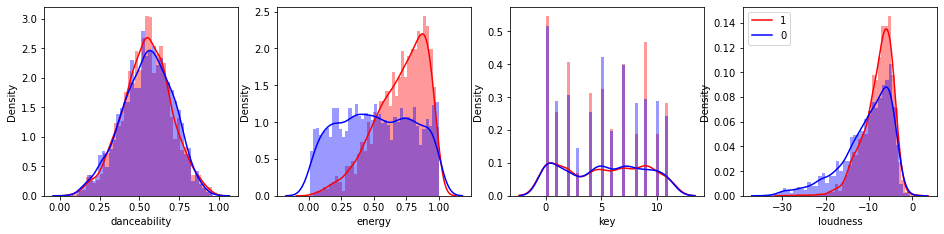

In [16]:
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(songs[songs['song_like']==1]['danceability'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['danceability'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(songs[songs['song_like']==1]['energy'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['energy'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(songs[songs['song_like']==1]['key'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['key'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(songs[songs['song_like']==1]['loudness'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['loudness'], color='blue', bins=40)
plt.legend((1,0))

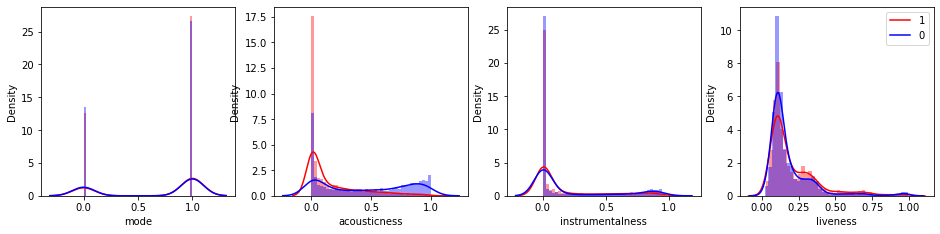

In [17]:
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(songs[songs['song_like']==1]['mode'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['mode'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(songs[songs['song_like']==1]['acousticness'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['acousticness'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(songs[songs['song_like']==1]['instrumentalness'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['instrumentalness'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(songs[songs['song_like']==1]['liveness'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['liveness'], color='blue', bins=40)
plt.legend((1,0))

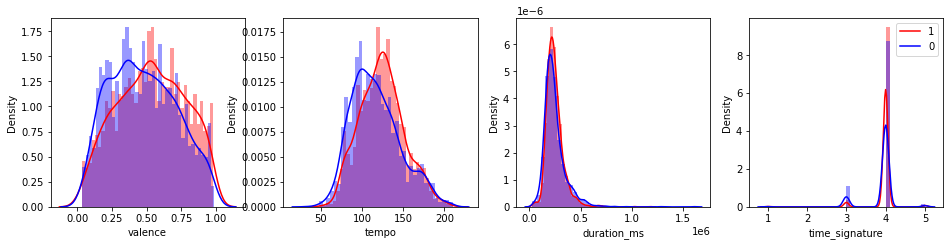

In [18]:
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(songs[songs['song_like']==1]['valence'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['valence'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(songs[songs['song_like']==1]['tempo'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['tempo'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(songs[songs['song_like']==1]['duration_ms'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['duration_ms'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(songs[songs['song_like']==1]['time_signature'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['time_signature'], color='blue', bins=40)
plt.legend((1,0))

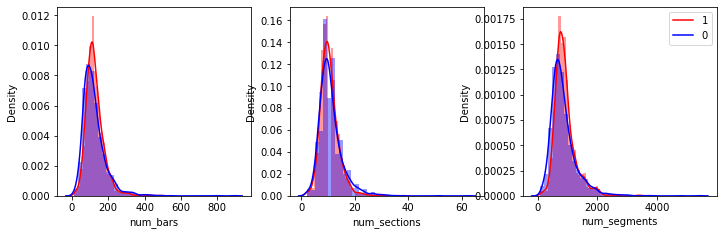

In [19]:
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(songs[songs['song_like']==1]['num_bars'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['num_bars'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(songs[songs['song_like']==1]['num_sections'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['num_sections'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(songs[songs['song_like']==1]['num_segments'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['num_segments'], color='blue', bins=40)
plt.legend((1,0))

In [20]:
X_train = prediction.drop('song_like', axis=1)
X_test = songs.drop(['song_like','title'], axis=1)
y_train = prediction['song_like']
y_test = songs['song_like']

In [21]:
X_train.head()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,speechiness,duration_ms,time_signature,valence.1,num_bars,num_sections,num_segments
0,0.555,0.923,6,-4.748,0,0.1970,0.0,0.0778,0.363,118.007,0.1610,192681,4,0.363,92,8,654
1,0.687,0.792,5,-2.749,1,0.1910,0.0,0.1670,0.671,100.015,0.0452,214290,4,0.671,88,9,789
2,0.679,0.715,9,-6.383,1,0.0755,0.0,0.2710,0.571,127.435,0.0407,214148,4,0.571,113,11,761
3,0.787,0.780,7,-5.023,1,0.2500,0.0,0.0908,0.680,95.035,0.1290,173206,4,0.680,68,8,752
4,0.685,0.742,8,-5.409,1,0.2200,0.0,0.1850,0.618,115.008,0.0471,213511,4,0.618,100,10,745


In [22]:
X_test.head()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,speechiness,duration_ms,time_signature,valence.1,num_bars,num_sections,num_segments
0,0.555,0.923,6,-4.748,0,0.1970,0.0,0.0778,0.363,118.007,0.1610,192681,4,0.363,92,8,654
1,0.687,0.792,5,-2.749,1,0.1910,0.0,0.1670,0.671,100.015,0.0452,214290,4,0.671,88,9,789
2,0.679,0.715,9,-6.383,1,0.0755,0.0,0.2710,0.571,127.435,0.0407,214148,4,0.571,113,11,761
3,0.787,0.780,7,-5.023,1,0.2500,0.0,0.0908,0.680,95.035,0.1290,173206,4,0.680,68,8,752
4,0.685,0.742,8,-5.409,1,0.2200,0.0,0.1850,0.618,115.008,0.0471,213511,4,0.618,100,10,745


In [23]:
y_train.tail()

2121    0
2122    0
2123    0
2124    0
2125    0
Name: song_like, dtype: int32

In [24]:
y_test.head()

0    1
1    1
2    1
3    1
4    1
Name: song_like, dtype: int32

In [25]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [26]:
lr_pred = lr_model.predict(X_test)
print(confusion_matrix(y_test, lr_pred))
print('\n')
print(classification_report(y_test, lr_pred))

[[1404  609]
 [1039  796]]


              precision    recall  f1-score   support

           0       0.57      0.70      0.63      2013
           1       0.57      0.43      0.49      1835

    accuracy                           0.57      3848
   macro avg       0.57      0.57      0.56      3848
weighted avg       0.57      0.57      0.56      3848



In [27]:
knn_model = KNeighborsClassifier() 
  
knn_model.fit(X_train, y_train) 

KNeighborsClassifier()

In [28]:
knn_pred = knn_model.predict(X_test)
print(confusion_matrix(y_test, knn_pred))
print('\n')
print(classification_report(y_test, knn_pred))

[[1481  532]
 [ 555 1280]]


              precision    recall  f1-score   support

           0       0.73      0.74      0.73      2013
           1       0.71      0.70      0.70      1835

    accuracy                           0.72      3848
   macro avg       0.72      0.72      0.72      3848
weighted avg       0.72      0.72      0.72      3848



In [29]:
songs['prediction'] = lr_pred

In [30]:
songs.sort_values('title').head()

,title,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,speechiness,duration_ms,time_signature,valence.1,num_bars,num_sections,num_segments,song_like,prediction
1340,$20 Fine,0.569,0.887,0,-8.972,1,0.0896,0.431000,0.3450,0.738,120.949,0.0397,299080,4,0.738,150,13,1131,1,1
961,'Deed I Do,0.566,0.218,7,-16.936,1,0.8950,0.000061,0.0956,0.434,134.130,0.0369,133667,4,0.434,73,6,386,0,0
1984,'Enery,0.614,0.540,5,-14.017,1,0.0027,0.000289,0.1160,0.801,114.909,0.0725,142707,4,0.801,64,8,558,1,1
7,'Round Midnight,0.542,0.320,8,-9.975,1,0.9070,0.649000,0.0609,0.206,116.648,0.0387,193840,4,0.206,90,9,602,0,0
16,'Round Midnight (feat. John Coltrane),0.494,0.182,10,-11.116,0,0.7900,0.000360,0.1290,0.210,112.689,0.0443,355333,4,0.210,167,15,963,0,0


In [31]:
final_prediction = songs[['title','song_like','prediction']]


In [32]:
final_prediction

,title,song_like,prediction
0,Joy,1,0
1,Happier,1,0
2,Pompeii,1,0
3,survivin',1,1
4,Another Place,1,0
...,...,...,...
2121,Daylight,0,0
2122,Tim McGraw,0,0
2123,Highway Don't Care,0,0
2124,Soon You’ll Get Better (feat. The Chicks),0,0


In [33]:
final_prediction.to_csv('final_prediction_out.csv')

In [34]:
pd.set_option('display.max_rows', final_prediction.shape[0]+1)
print(final_prediction)

                                                  title  song_like  prediction
0                                                   Joy          1           0
1                                               Happier          1           0
2                                               Pompeii          1           0
3                                             survivin'          1           1
4                                         Another Place          1           0
5                                            Good Grief          1           1
6                                          Of The Night          1           1
7                                                  Grip          1           1
8                                  WHAT YOU GONNA DO???          1           0
9                                            Goosebumps          1           1
10                                             Oblivion          1           0
11                                       World Gone 